# **Rendelés tábla adatmodellezése**

## REND\_DATUM

### sorok száma

In [ ]:
SELECT COUNT(REND_DATUM) AS 'Sorok száma'
FROM Rendeles

### null - nem null értékek

In [ ]:
SELECT 
    COUNT(*) AS 'Összes sor',
    COUNT(REND_DATUM) AS 'Nem null',
    COUNT(*) - COUNT(REND_DATUM) AS 'null'
FROM Rendeles

### legkorábbi, legfrissebb rendelés

In [ ]:
SELECT MIN(REND_DATUM) AS 'Legkorábbi rendelés', 
       MAX(REND_DATUM) AS 'Legutóbbi rendelés',
       DATEDIFF(day, MIN(REND_DATUM), MAX(REND_DATUM)) AS 'Köztük eltelt napok száma'
FROM Rendeles
WHERE REND_DATUM IS NOT NULL

### Évre lebontott rendelések száma

In [ ]:
SELECT YEAR(REND_DATUM) AS 'Év',COUNT(*) AS 'Rendelések száma'
FROM Rendeles
GROUP BY YEAR(REND_DATUM)
ORDER BY COUNT(*) DESC

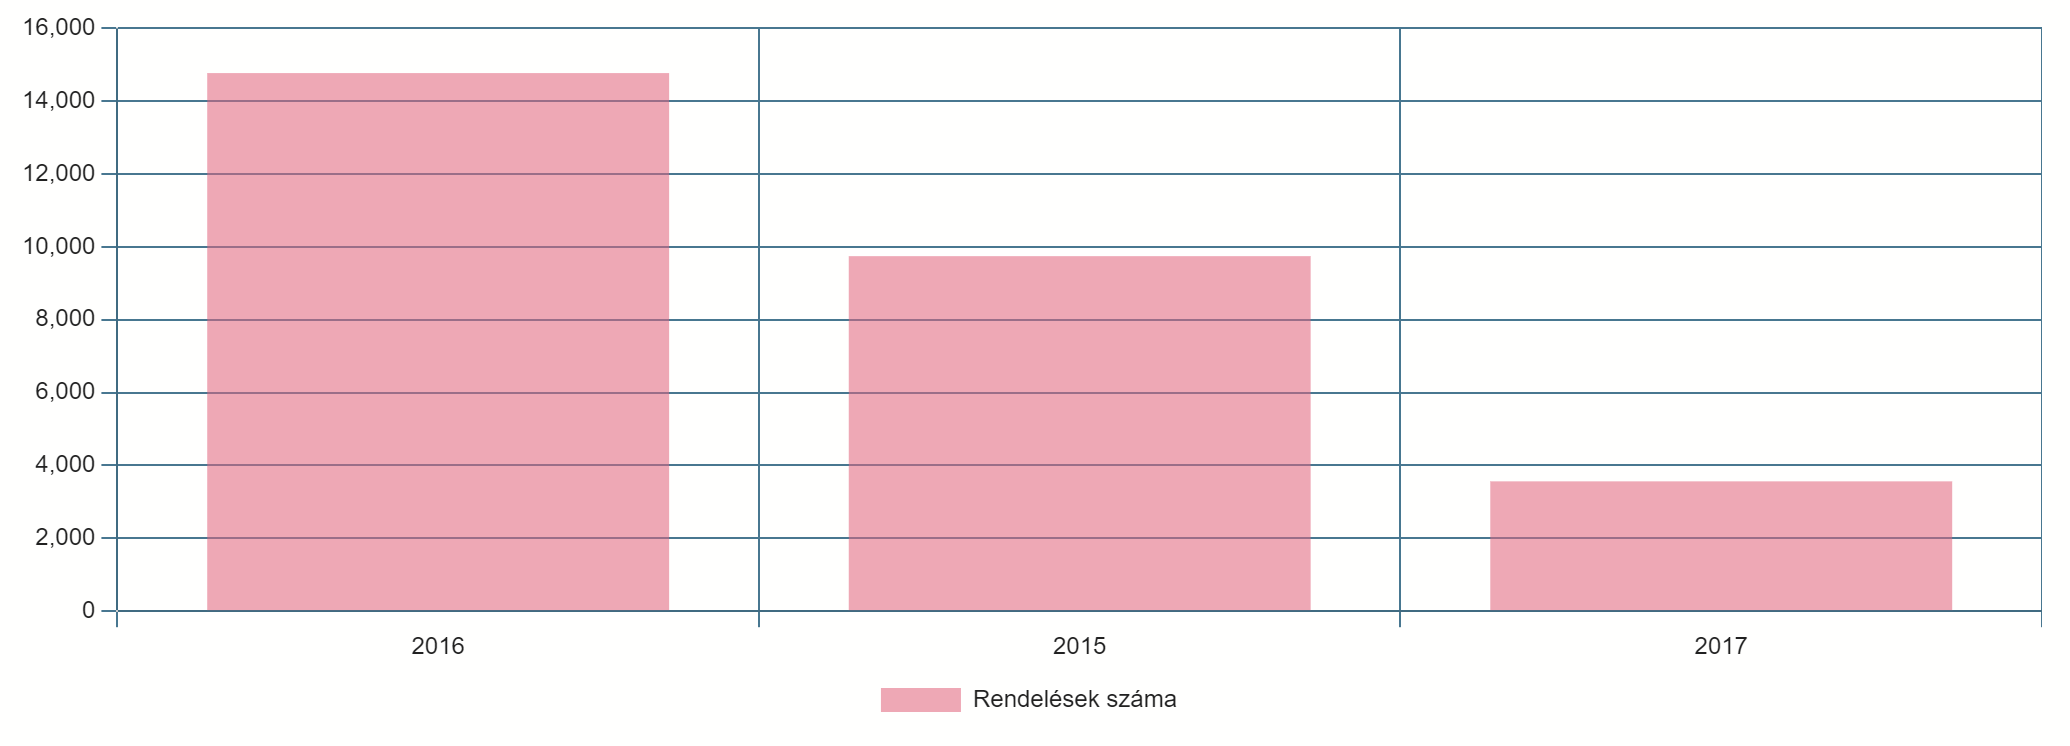

### 3 hónap a legkevesebb rendeléssel

In [ ]:
SELECT TOP 3
    MONTH(REND_DATUM) AS value, 
    COUNT(*) AS 'Rendelések száma'
from Rendeles
WHERE MONTH(REND_DATUM) IS NOT null
GROUP BY MONTH(REND_DATUM)
ORDER BY COUNT(*) ASC

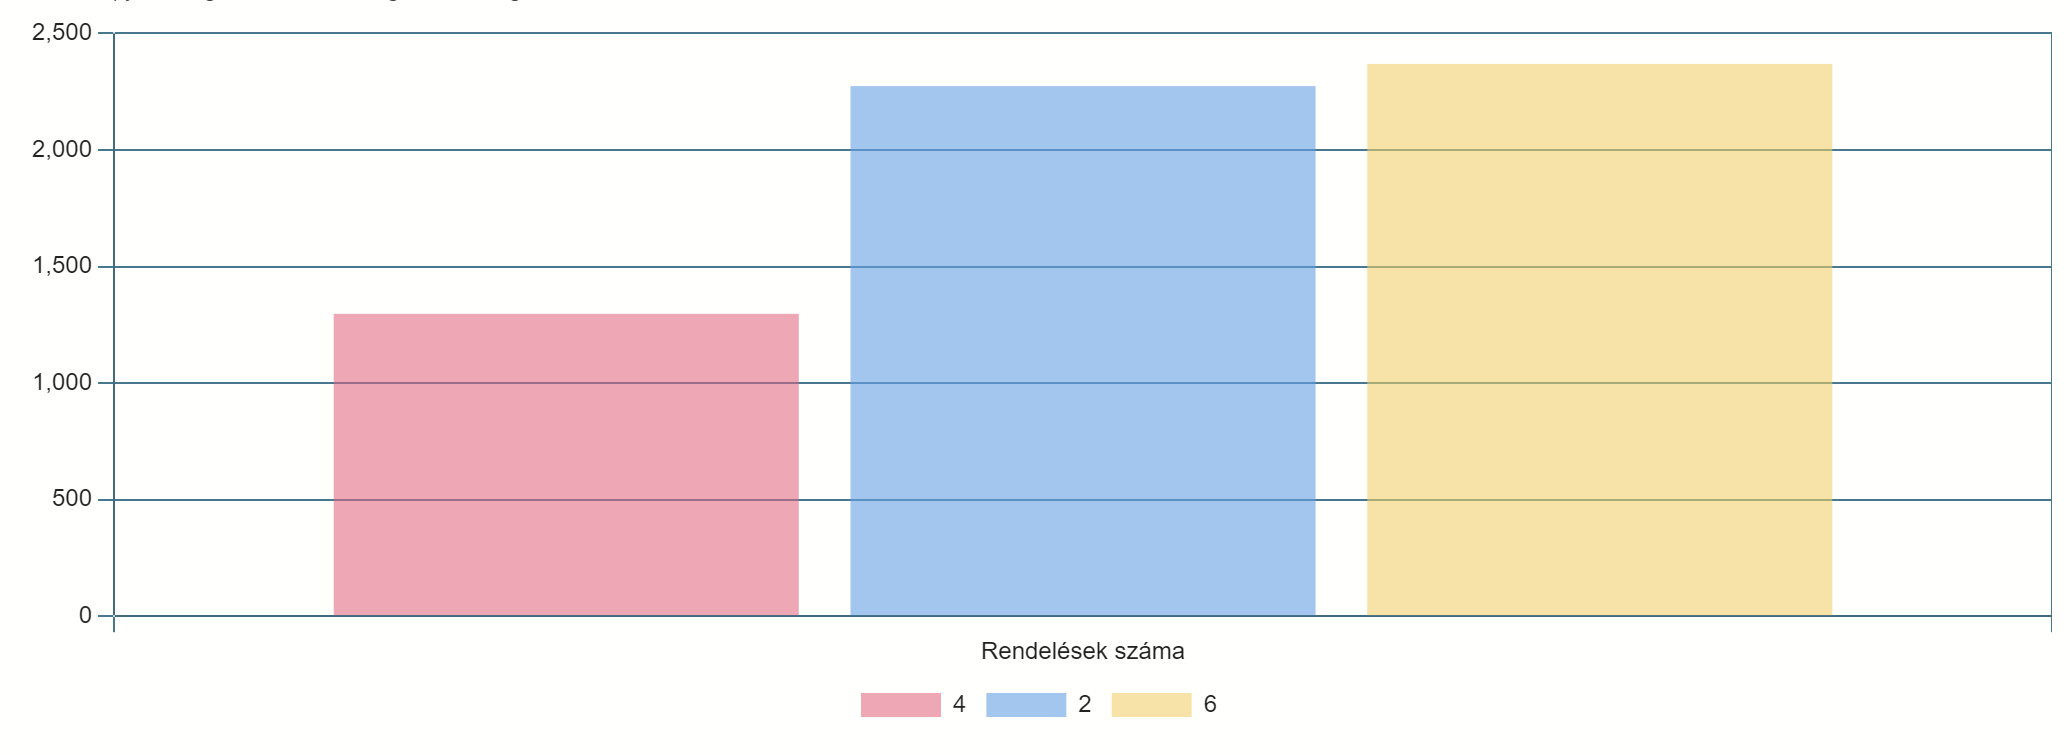

## SZALL\_CIM

### sorok száma

In [ ]:
SELECT COUNT(*) AS 'Sorok száma'
FROM Rendeles

### null - nem null értékek száma

In [ ]:
SELECT 
    COUNT(*) AS 'Összes sor',
    COUNT(SZALL_CIM) AS 'Nem null',
    COUNT(*) - COUNT(SZALL_CIM) AS 'null'
FROM Rendeles

### top 3 leggyakoribb rendelési cím és hozzátartozó rendelések száma

In [8]:
SELECT top 3
    SZALL_CIM AS 'Cím', 
    COUNT(*) AS 'Rendelések száma'
from Rendeles
WHERE SZALL_CIM IS NOT null
GROUP BY SZALL_CIM
ORDER BY COUNT(*) DESC

(3 rows affected)

Total execution time: 00:00:00.038

Cím,Rendelések száma
"Budapest, Fő u. 2.",303
"Budapest, Kiss u. 32.",215
"Győr, Fő u. 2.",154


### városra lebontott rendelések száma, ahol több mint 100

In [ ]:
SELECT LEFT(SZALL_CIM,CHARINDEX(',', SZALL_CIM)-1) AS 'Város', COUNT(*) AS 'Rendelések száma'
FROM Rendeles
WHERE SZALL_CIM IS NOT NULL
GROUP BY LEFT(SZALL_CIM,CHARINDEX(',', SZALL_CIM)-1)
HAVING COUNT(*)>100
ORDER BY [Rendelések száma] DESC

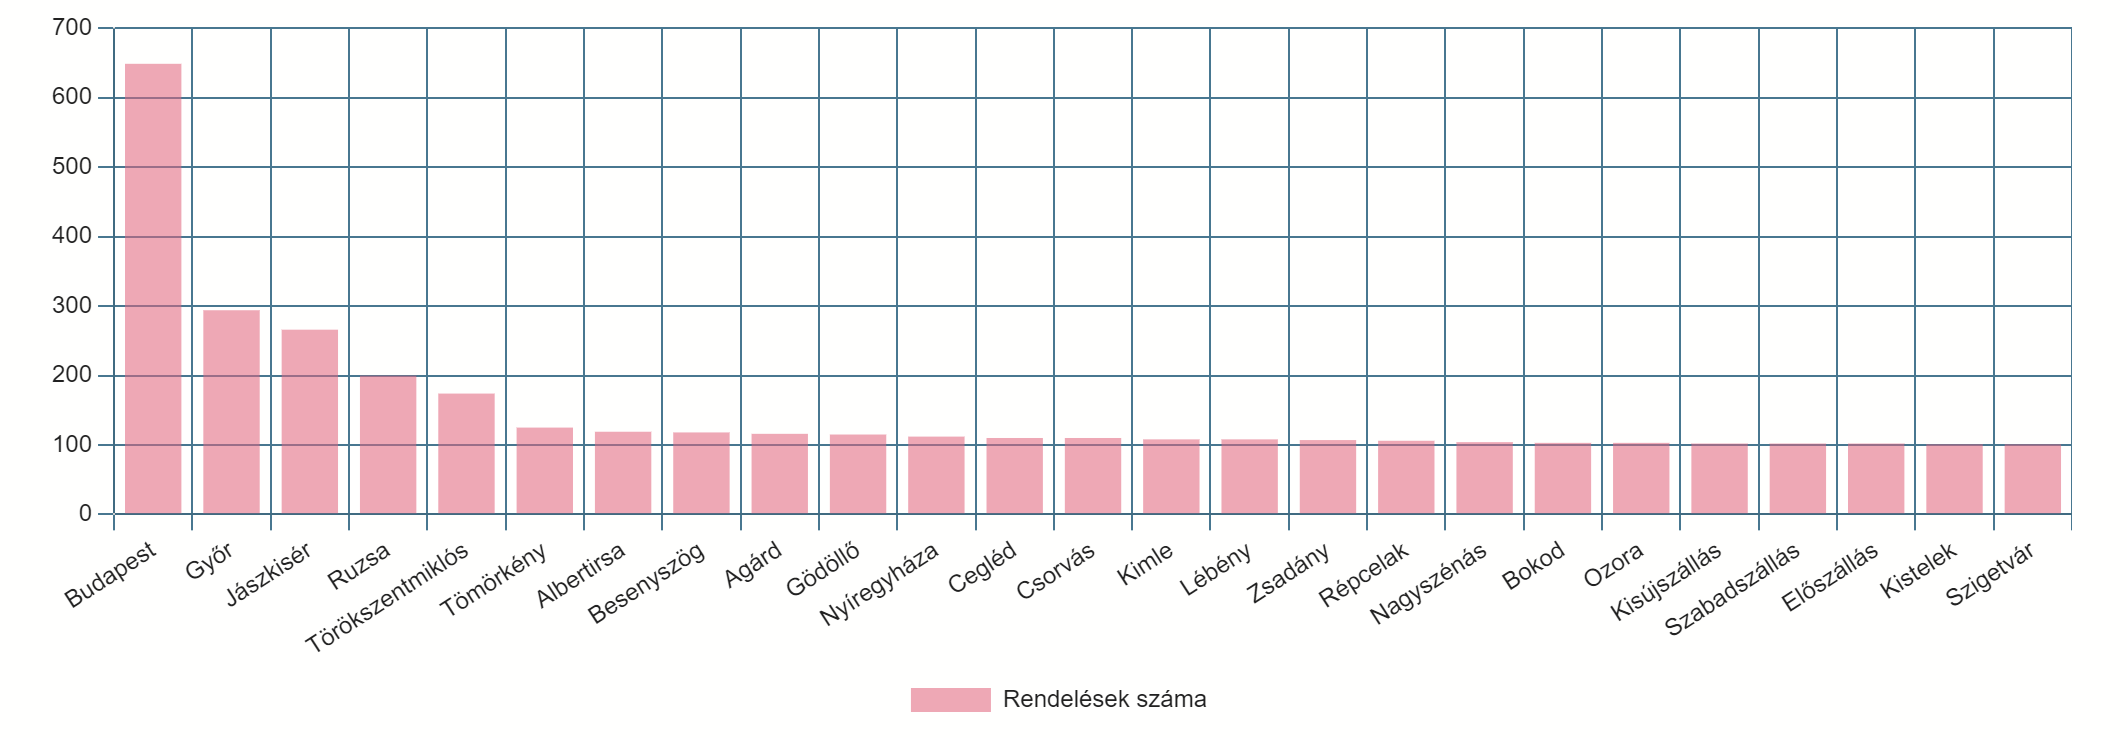

## FIZ\_MOD

### sorok száma

In [3]:
SELECT COUNT(*) AS 'Sorok száma'
FROM Rendeles

(1 row affected)

Total execution time: 00:00:00.022

Sorok száma
28085


### null - nem null értékek száma

In [4]:
SELECT 
    COUNT(*) AS 'Összes sor',
    COUNT(FIZ_MOD) AS 'Nem null',
    COUNT(*) - COUNT(FIZ_MOD) AS 'null'
FROM Rendeles

(1 row affected)

Total execution time: 00:00:00.031

Összes sor,Nem null,null
28085,28085,0


### fizetési módra lebontva fizetések száma

In [7]:
SELECT FIZ_MOD AS 'Fizetési mód', COUNT(*) AS 'Rendelések száma'
FROM Rendeles
GROUP BY FIZ_MOD

(3 rows affected)

Total execution time: 00:00:00.041

Fizetési mód,Rendelések száma
Bankkártya,14003
Átutalás,11284
Készpénz,2798


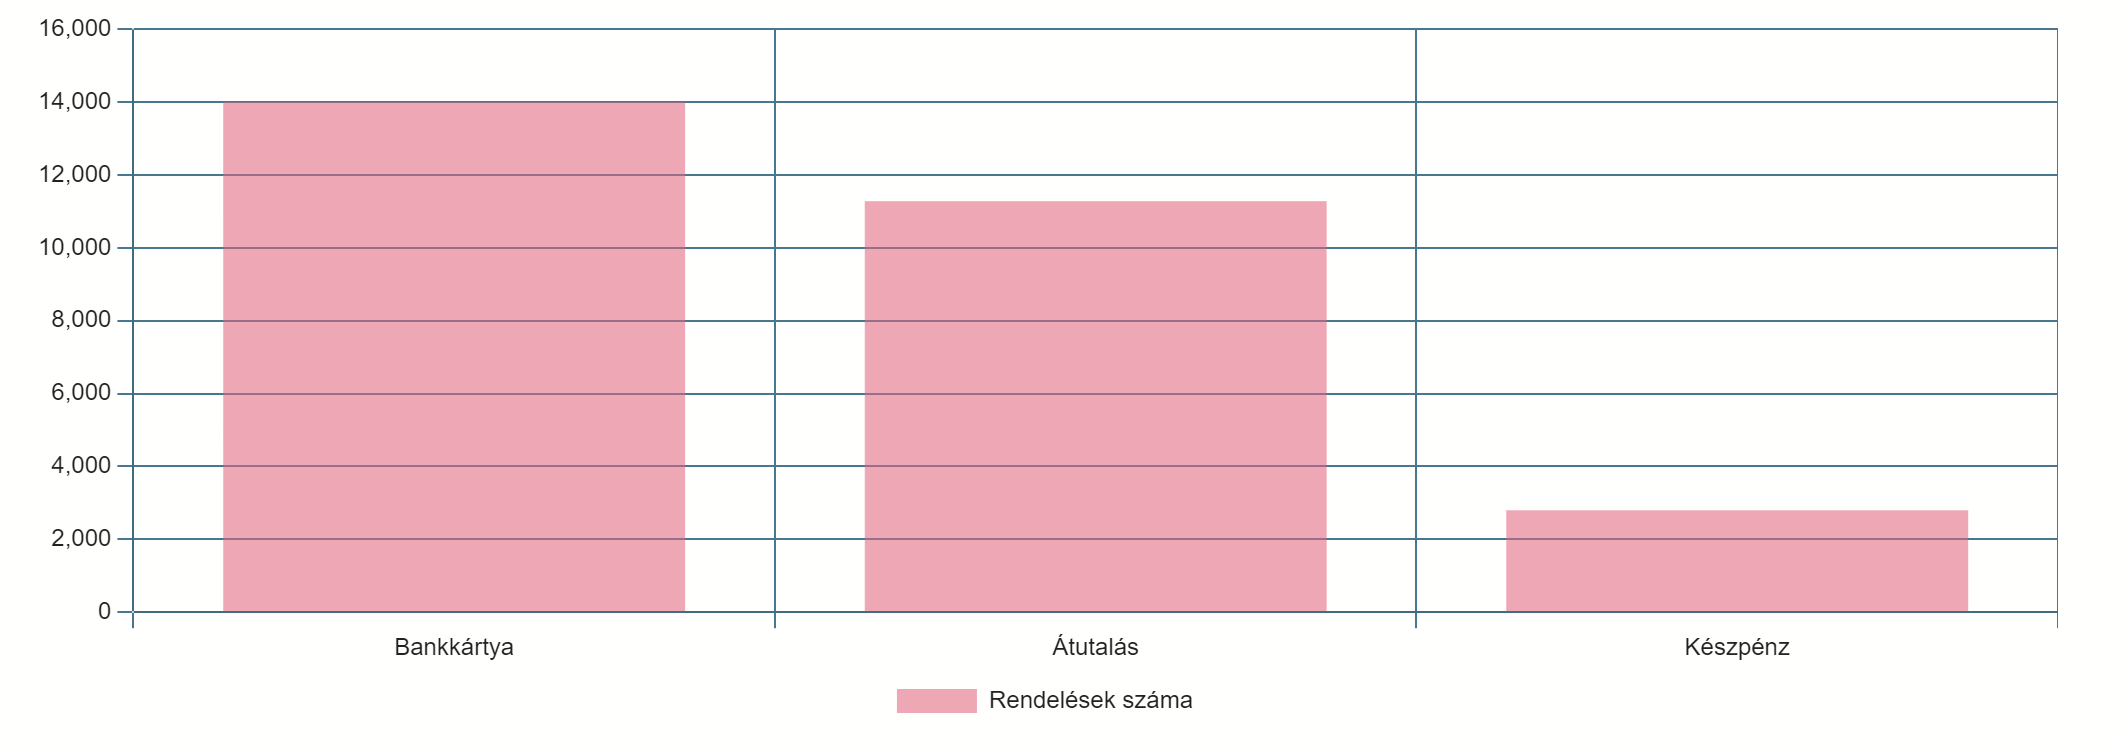